In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.5
1.19.4


In [42]:
# create和属性
s = pd.Series([1,2,3,3,np.nan,4,4,1])
print(s)

dates = pd.date_range('20200101',periods=6)
print("dates:\n",dates)

df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
print(df)
print(pd.DataFrame(np.random.randn(12).reshape((3,4))))

df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(['test','train','test','train']),
                   'F':'foo'})
print(df2)
print(df2.dtypes) 
print(df2.index) # 所有行的名称
print(df2.columns) # 所有列的名称
print(df2.values)
print(df2.describe())
print(df2.T)

0    1.0
1    2.0
2    3.0
3    3.0
4    NaN
5    4.0
6    4.0
7    1.0
dtype: float64
dates:
 DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')
                   a         b         c         d
2020-01-01 -0.084928  0.923450  0.134373 -0.963396
2020-01-02  0.491429  0.097761  0.842102  1.437599
2020-01-03 -0.906181 -0.360107 -0.271169  0.132385
2020-01-04 -1.011373  0.139925  0.588140 -1.863724
2020-01-05  0.303153 -0.263035 -1.512811 -0.210297
2020-01-06 -0.457181  0.554160  0.819109 -2.034337
          0         1         2         3
0  0.396337  0.385745  0.336400  0.003467
1 -1.471631 -0.198823  1.000828 -0.288885
2 -0.009580  0.790303 -0.678654 -1.296115
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    da

In [45]:
# 排序
print(df2.sort_index(axis=1,ascending=False)) # 根据行进行排序
print(df2.sort_index(axis=0,ascending=False)) # 根据行进行排序
print(df2.sort_values(by='E')) # 根据值进行排序

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0
     A          B    C  D      E    F
3  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
0  1.0 2013-01-02  1.0  3   test  foo
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [95]:
# 选择数据
dates = pd.date_range('20200101',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)
print(df['A'])
print(df.A)
print(df[0:3])
print(df['2020-01-02':'2020-01-04'])

# select by lable:loc
print(df.loc['20200102'])
print(df.loc[:,['A','B']])
print(df.loc['20200103':,['A','B']])


# select by position:iloc
print(df.iloc[3,1])
print(df.iloc[3:5,1:3])
print(df.iloc[[1,3,5],1:3])

# Boolean indexing
print(df[df.A>8])

             A   B   C   D
2020-01-01   0   1   2   3
2020-01-02   4   5   6   7
2020-01-03   8   9  10  11
2020-01-04  12  13  14  15
2020-01-05  16  17  18  19
2020-01-06  20  21  22  23
2020-01-01     0
2020-01-02     4
2020-01-03     8
2020-01-04    12
2020-01-05    16
2020-01-06    20
Freq: D, Name: A, dtype: int64
2020-01-01     0
2020-01-02     4
2020-01-03     8
2020-01-04    12
2020-01-05    16
2020-01-06    20
Freq: D, Name: A, dtype: int64
            A  B   C   D
2020-01-01  0  1   2   3
2020-01-02  4  5   6   7
2020-01-03  8  9  10  11
             A   B   C   D
2020-01-02   4   5   6   7
2020-01-03   8   9  10  11
2020-01-04  12  13  14  15
A    4
B    5
C    6
D    7
Name: 2020-01-02 00:00:00, dtype: int64
             A   B
2020-01-01   0   1
2020-01-02   4   5
2020-01-03   8   9
2020-01-04  12  13
2020-01-05  16  17
2020-01-06  20  21
             A   B
2020-01-03   8   9
2020-01-04  12  13
2020-01-05  16  17
2020-01-06  20  21
13
             B   C
2020-01-04  13  14


In [189]:
# 设置值
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.arange(24,dtype='float64').reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)
df.iloc[2,2]=111
df.loc['20130101','B']=222
# df[df.A>4]=0 # A>4的所有行
# print(df)
df.A[df.A>4] = 0
df.B[df.A>4] = 0
# print(df)
df['F'] = np.nan
df['E'] = pd.Series([1,2,3,4,5,6], index=dates)
print(df)


               A     B     C     D
2013-01-01   0.0   1.0   2.0   3.0
2013-01-02   4.0   5.0   6.0   7.0
2013-01-03   8.0   9.0  10.0  11.0
2013-01-04  12.0  13.0  14.0  15.0
2013-01-05  16.0  17.0  18.0  19.0
2013-01-06  20.0  21.0  22.0  23.0
              A      B      C     D   F  E
2013-01-01  0.0  222.0    2.0   3.0 NaN  1
2013-01-02  4.0    5.0    6.0   7.0 NaN  2
2013-01-03  0.0    9.0  111.0  11.0 NaN  3
2013-01-04  0.0   13.0   14.0  15.0 NaN  4
2013-01-05  0.0   17.0   18.0  19.0 NaN  5
2013-01-06  0.0   21.0   22.0  23.0 NaN  6


In [212]:
# 处理丢失数据
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.arange(24,dtype='float64').reshape((6,4)),index=dates,columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

print(df)
print(df.dropna(axis=0,how='any')) # how={'any','all'}
print(df.fillna(value=0))
print(df.isnull())
print(np.any(df.isnull)==True) # 判断是否存在丢失数据


               A     B     C     D
2013-01-01   0.0   NaN   2.0   3.0
2013-01-02   4.0   5.0   NaN   7.0
2013-01-03   8.0   9.0  10.0  11.0
2013-01-04  12.0  13.0  14.0  15.0
2013-01-05  16.0  17.0  18.0  19.0
2013-01-06  20.0  21.0  22.0  23.0
               A     B     C     D
2013-01-03   8.0   9.0  10.0  11.0
2013-01-04  12.0  13.0  14.0  15.0
2013-01-05  16.0  17.0  18.0  19.0
2013-01-06  20.0  21.0  22.0  23.0
               A     B     C     D
2013-01-01   0.0   0.0   2.0   3.0
2013-01-02   4.0   5.0   0.0   7.0
2013-01-03   8.0   9.0  10.0  11.0
2013-01-04  12.0  13.0  14.0  15.0
2013-01-05  16.0  17.0  18.0  19.0
2013-01-06  20.0  21.0  22.0  23.0
                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False
False


In [4]:
# pandas 导入导出
data = pd.read_csv("data/student.csv")
data.to_pickle('data/student.pickle')

In [24]:
# 合并concat
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

res = pd.concat([df1,df2,df3],axis=0, ignore_index=True)
res


,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [33]:
# join ={outer,inner}
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['b','c','d','e'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'],index =[2,3,4])
res = pd.concat([df1,df2], join='inner',ignore_index=True)
res


,b,c,d
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0


In [47]:
# appand
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*0, columns=['b','c','d','e'], index=[1,2,3])
res = df1.append(df2,ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


<AxesSubplot:>

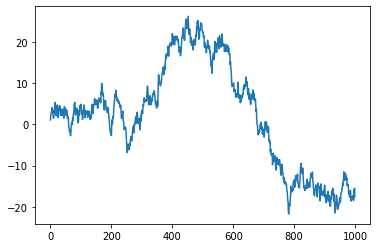

In [11]:
import matplotlib.pyplot as plt
data = pd.Series(np.random.randn(1000))
data = data.cumsum()
data.plot()
# plt.show()



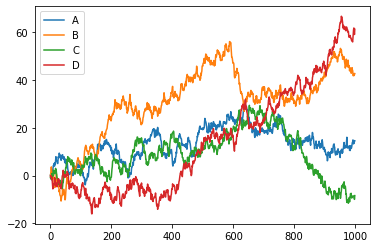

In [27]:
# dataFrame
data = pd.DataFrame(np.random.randn(1000,4),
                   index=np.arange(1000),
                   columns=list("ABCD"))
data = data.cumsum()

data.plot()
plt.show()

<AxesSubplot:xlabel='A', ylabel='C'>

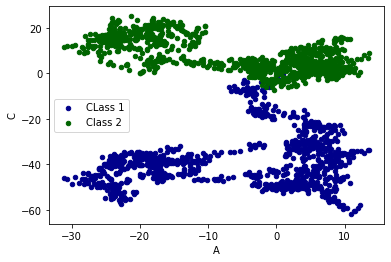

In [39]:
# dataFrame
data = pd.DataFrame(np.random.randn(1000,4),
                   index=np.arange(1000),
                   columns=list("ABCD"))
data = data.cumsum()

ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='CLass 1')
data.plot.scatter(x='A',y='C',Color="DarkGreen",label='Class 2',ax=ax)